In [1]:
import visualkeras
from keras.regularizers import l2
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, Input
from tensorflow.keras.models import Sequential
from PIL import ImageFont
from collections import defaultdict

2024-03-03 16:51:59.609307: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Base Model

In [ ]:
input_shape = (128, 128, 1)
l2_reg = 0.001  # Regularization strength
dropout = [0.15, 0,4]
n_filter = [128, 64, 32, 128]

model = Sequential([
    # First Conv Block
    Conv2D(n_filter[0], (3, 3), padding='same', activation='relu', input_shape=input_shape, kernel_regularizer=l2(l2_reg)),
    BatchNormalization(), # Batch normalization normalizes the output of a previous activation layer by subtracting the batch mean and dividing by the batch standard deviation
    MaxPooling2D(pool_size=(2, 2)), # Max pooling reduces computation by reducing the dimensionality of the feature maps
    Dropout(dropout[0]), # Dropout to prevent overfitting
    # Second Conv Block
    Conv2D(n_filter[1], (3, 3), padding='same', activation='relu', kernel_regularizer=l2(l2_reg)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(dropout[0]),
    # Third Conv Block
    Conv2D(n_filter[2], (3, 3), padding='same', activation='relu', kernel_regularizer=l2(l2_reg)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(dropout[0]),
    # Flatten and Dense Layers
    Flatten(),
    Dense(n_filter[3], activation='relu', kernel_regularizer=l2(l2_reg)),
    BatchNormalization(),
    Dropout(dropout[1]),
    Dense(7, activation='softmax', kernel_regularizer=l2(l2_reg))  # 7 emotions
])

# Landmark Model

In [2]:
input_shape = (128, 128, 6)
l2_reg = 0.001  # Regularization strength
dropout = [0.25, 0.4]
n_filters = [128, 64, 32, 128]

model = Sequential([
    Input(shape=input_shape),
    # First Conv Block
    Conv2D(n_filters[0], (3, 3), padding='same', activation='relu', kernel_regularizer=l2(l2_reg)), 
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(dropout[0]),
    # Second Conv Block
    Conv2D(n_filters[1], (3, 3), padding='same', activation='relu', kernel_regularizer=l2(l2_reg)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(dropout[0]),
    # Third Conv Block
    Conv2D(n_filters[2], (3, 3), padding='same', activation='relu', kernel_regularizer=l2(l2_reg)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(dropout[0]),
    # Fourth Conv Block
    Conv2D(n_filters[1], (3, 3), padding='same', activation='relu', kernel_regularizer=l2(l2_reg)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(dropout[0]),
    # Flatten and Dense Layers
    Flatten(),
    Dense(n_filters[3], activation='relu', kernel_regularizer=l2(l2_reg)),
    BatchNormalization(),
    Dropout(dropout[1]),
    Dense(7, activation='softmax', kernel_regularizer=l2(l2_reg))  # 7 classes for the output
])

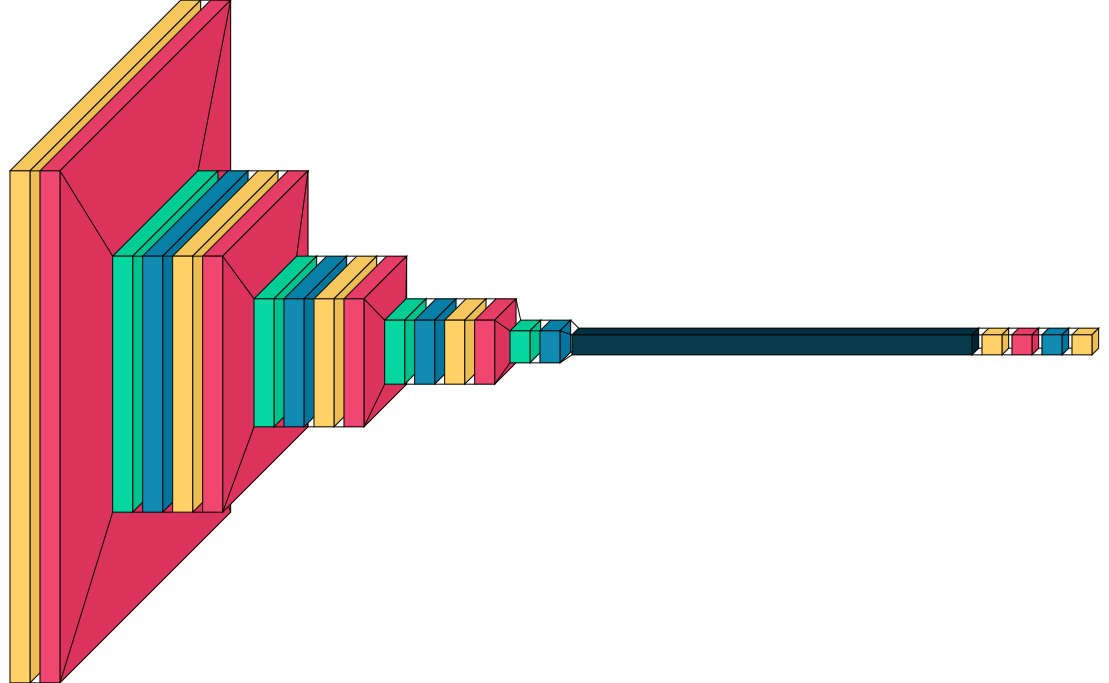

In [4]:
color_map = defaultdict(dict)
color_map[Dense]['fill'] = 'orange'
# visualkeras.layered_view(model).show() # display using your system viewer
# visualkeras.layered_view(model, to_file='output.png') # write to disk
font = ImageFont.truetype("00 documents/arial.ttf", 16)
visualkeras.layered_view(model, legend=True, font=font, color_map=color_map, to_file='output.png').show() # write and show

visualkeras.layered_view(model)